In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

# Please, run before mc_gpu_sphere.py before of plotting the figures

points_total = np.load('points_total_sphere.npy')
points = np.load('points_sphere.npy')

<IPython.core.display.Javascript object>


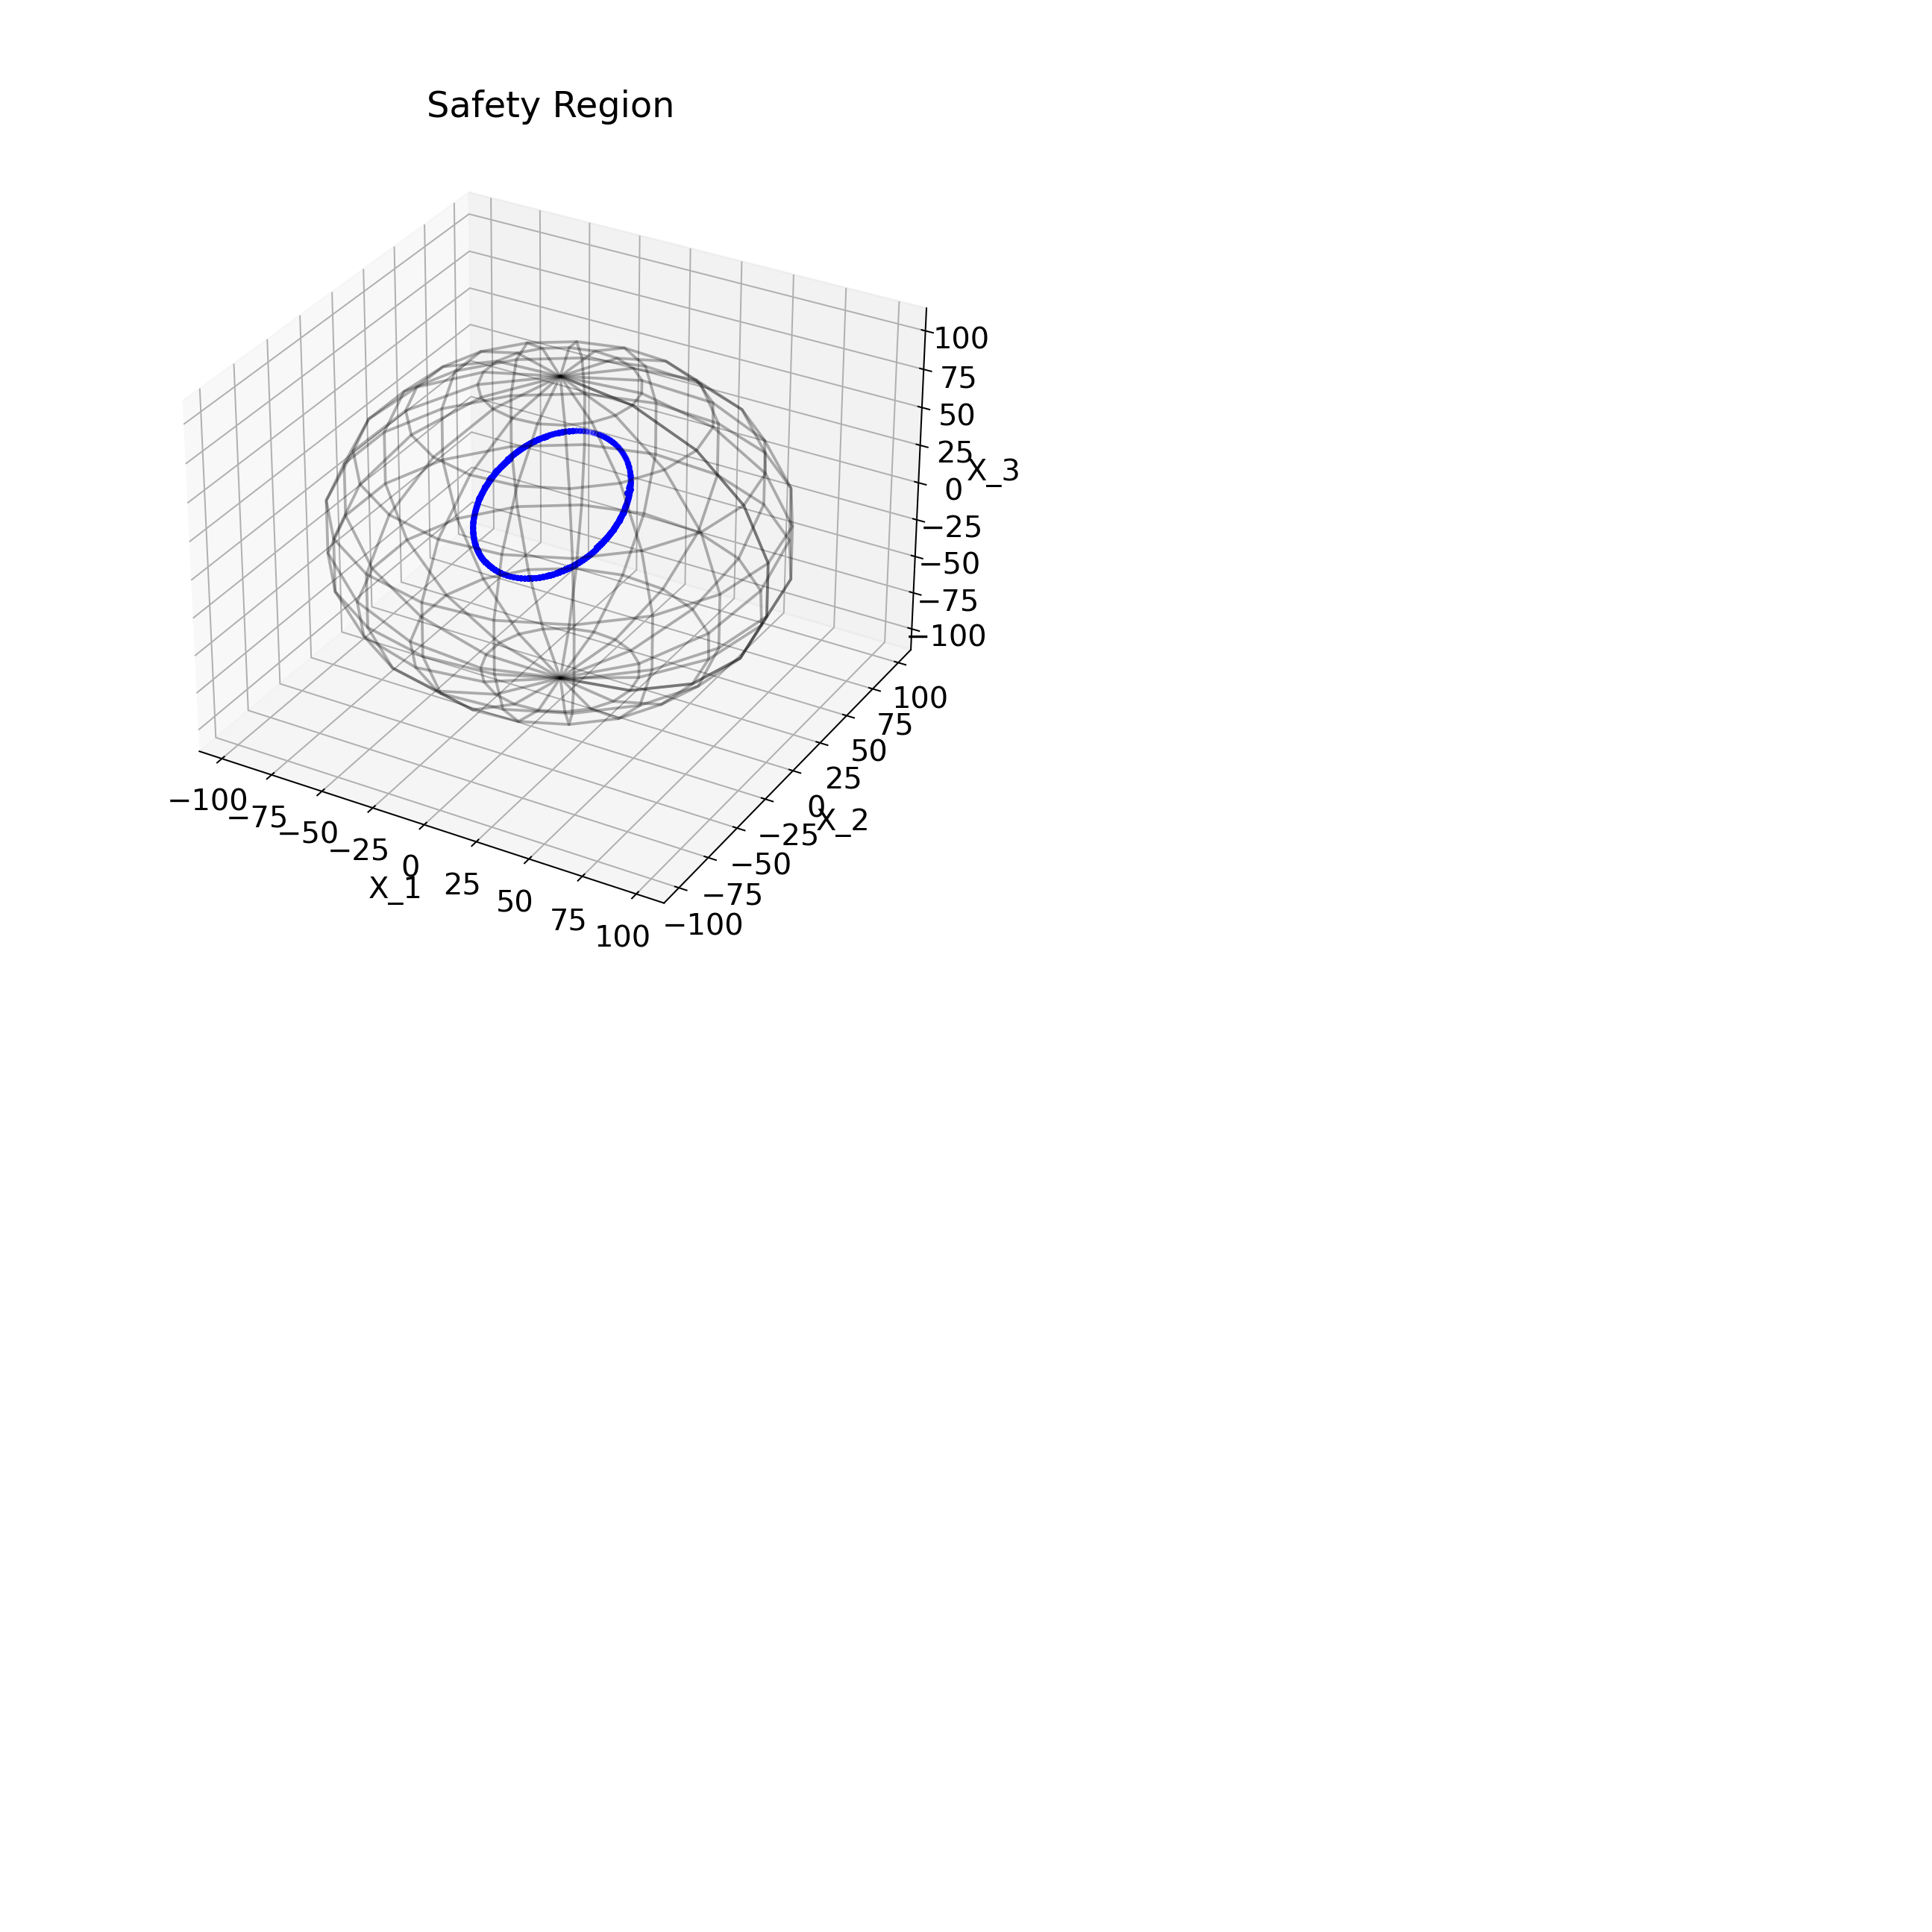

In [13]:
%matplotlib notebook
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

plt.title('Safety Region')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('X_3')

sphere_c = np.array([0., 0., 0.])
sphere_r = np.array([100.])
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)*(sphere_r)
y = np.sin(u)*np.sin(v)*(sphere_r)
z = np.cos(v)*(sphere_r)
ax.plot_wireframe(x, y, z, color='black', alpha=0.3)
        
ax.scatter(points_total[:,0], points_total[:,1], points_total[:,2], marker='o', color="blue", s=5.)
plt.show()

<IPython.core.display.Javascript object>


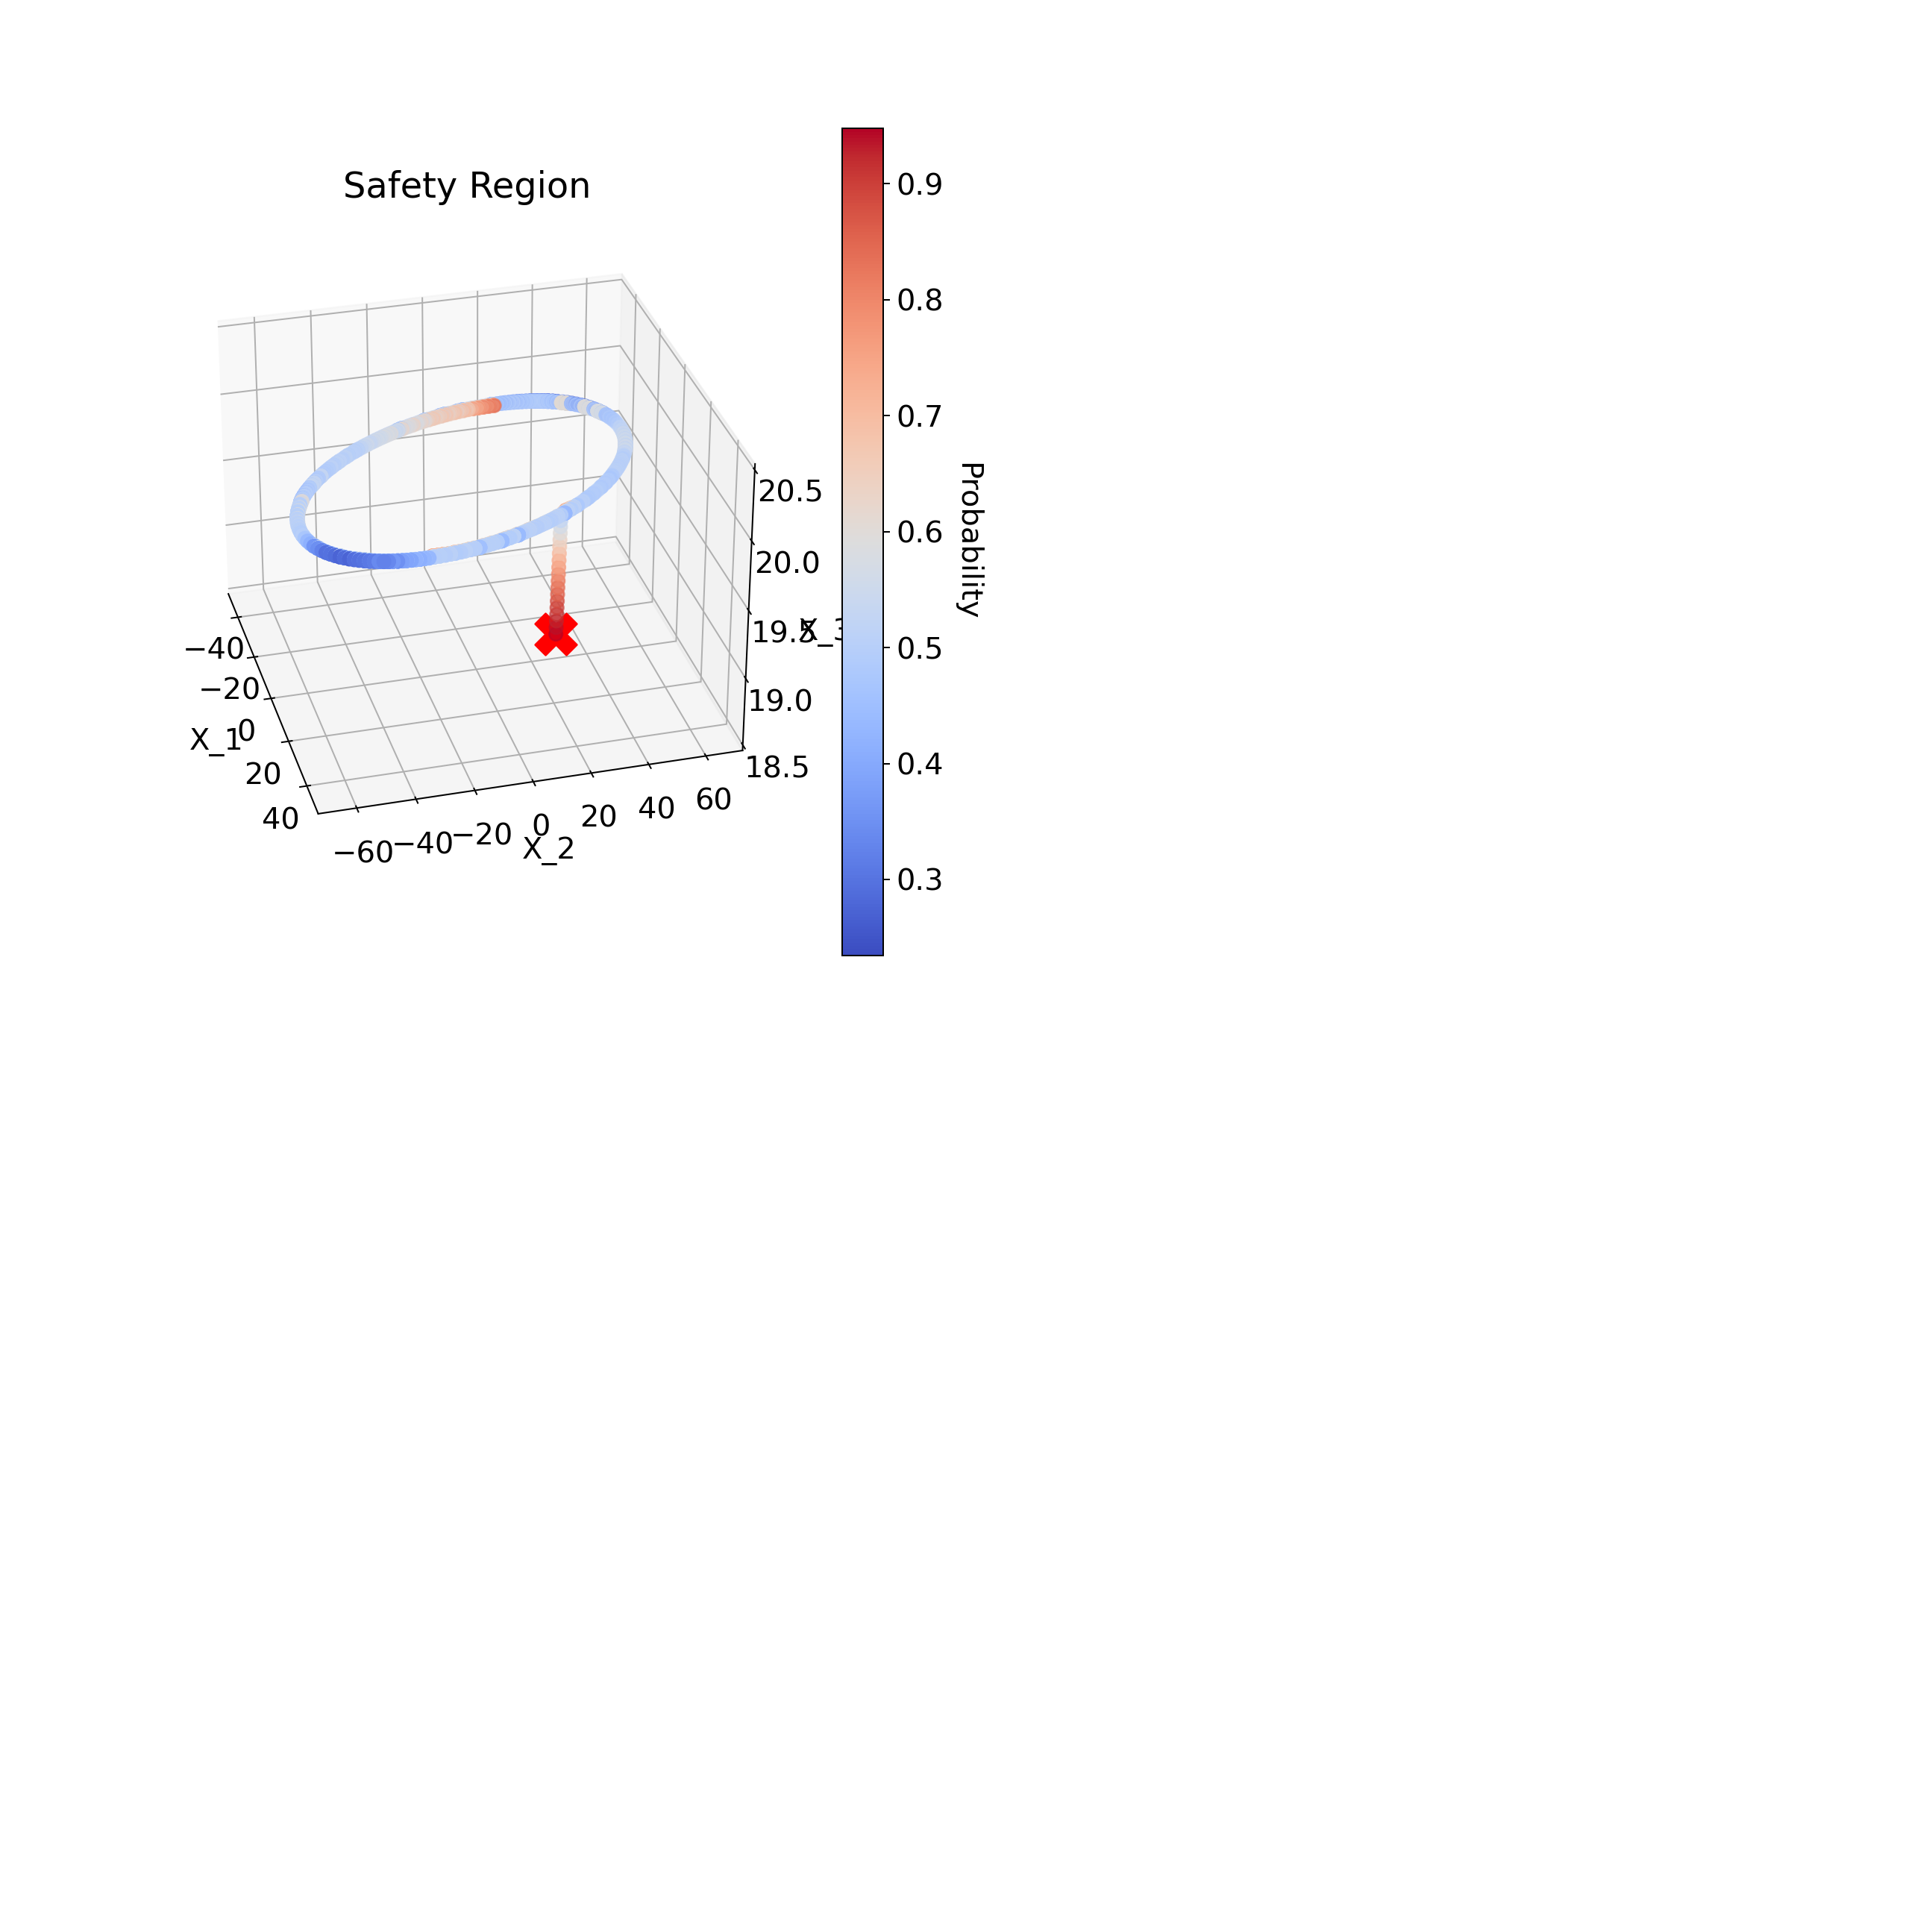

In [14]:
%matplotlib notebook
plt.rcParams.update({'font.size': 16})

cm = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

plt.title('Safety Region')
ax.set_xlim(-50, 50)
ax.set_ylim(-70, 70)
ax.set_zlim(18.5, 20.5)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('X_3')

sphere_c = np.array([0., 0., 0.])
sphere_r = np.array([100.])
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)*(sphere_r)
y = np.sin(u)*np.sin(v)*(sphere_r)
z = np.cos(v)*(sphere_r)

color_bar = np.minimum(1, np.maximum(0.2, points_total[:,3]))
ax.scatter(points_total[0,0], points_total[0,1], points_total[0,2], marker='X', color="r", s=500.)        
p = ax.scatter(points_total[:,0], points_total[:,1], points_total[:,2], 
           c=color_bar, cmap=cm, s=50)

cbar = plt.colorbar(p)
cbar.ax.set_ylabel('Probability', rotation=270, labelpad=20)
plt.show()


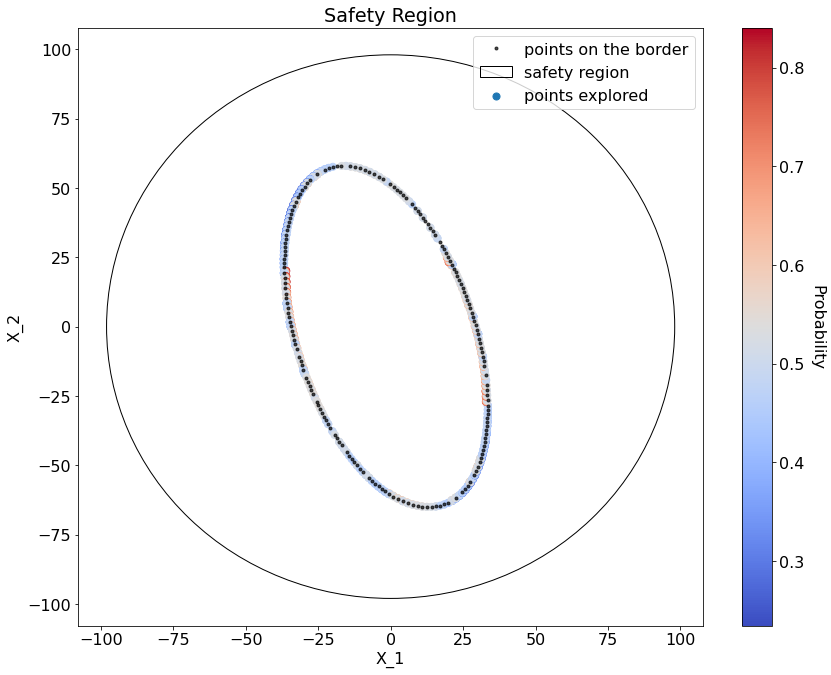

In [12]:
%matplotlib inline

plt.rcParams.update({'font.size': 16})

cm = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(14,11))
ax = plt.axes()

plt.title('Safety Region')
plt.xlabel('X_1')
plt.ylabel('X_2')

idx = points[-1,2]
idx = np.arange(points_total.shape[0])[points_total[:,2]==idx]

plt.gca().add_patch(plt.Circle((0, 0), (sphere_r[0]**2-points[-1,2]**2)**0.5, 
                               fill=False, color='black', label='safety region'))

idx2 = idx[np.logical_and(0.491 <= points_total[idx,3], points_total[idx,3]<= 0.509)]
idx1 = idx[np.logical_or(0.491 >= points_total[idx,3], points_total[idx,3] >= 0.509)]

color_bar = np.minimum(1, np.maximum(0.2, points_total[idx1,3]))
plt.scatter(points_total[idx1,0], points_total[idx1,1], c=color_bar, 
            cmap=cm, s=50, label='points explored') 
plt.plot(points_total[idx2,0], points_total[idx2,1], 
         '.', alpha=0.7, color='black', label='points on the border') 
ax.legend()

cbar = plt.colorbar()
cbar.ax.set_ylabel('Probability', rotation=270, labelpad=20)
plt.show()